In [1]:
import seaborn as sns
import numpy as np

from SpatialEM import spatialEM

In [10]:
sns.set(rc={'figure.figsize':(30,1.5)})

In [3]:
ems = []
for i in range(1, 4):
    ems.append(spatialEM(i))


Preallocating matrices ... 
Frequency 1 out of 1
Processing 1 out of 10 iterations
Processing 2 out of 10 iterations
Processing 3 out of 10 iterations
Processing 4 out of 10 iterations
Processing 5 out of 10 iterations
Processing 6 out of 10 iterations
Processing 7 out of 10 iterations
Processing 8 out of 10 iterations
Processing 9 out of 10 iterations
Processing 10 out of 10 iterations
Elapsed time is 28.723538 seconds.
tfs.evoked:  (1, 10, 438, 3, 8)
Preallocating matrices ... 
Frequency 1 out of 1
Processing 1 out of 10 iterations
Processing 2 out of 10 iterations
Processing 3 out of 10 iterations
Processing 4 out of 10 iterations
Processing 5 out of 10 iterations
Processing 6 out of 10 iterations
Processing 7 out of 10 iterations
Processing 8 out of 10 iterations
Processing 9 out of 10 iterations
Processing 10 out of 10 iterations
Elapsed time is 26.551122 seconds.
tfs.evoked:  (1, 10, 438, 3, 8)
Preallocating matrices ... 
Frequency 1 out of 1
Processing 1 out of 10 iterations
Pro

(1, 10, 438, 9, 8)

Before averaging tfs:  (10, 438, 3, 8)
After averaging  (438, 8)


<AxesSubplot: >

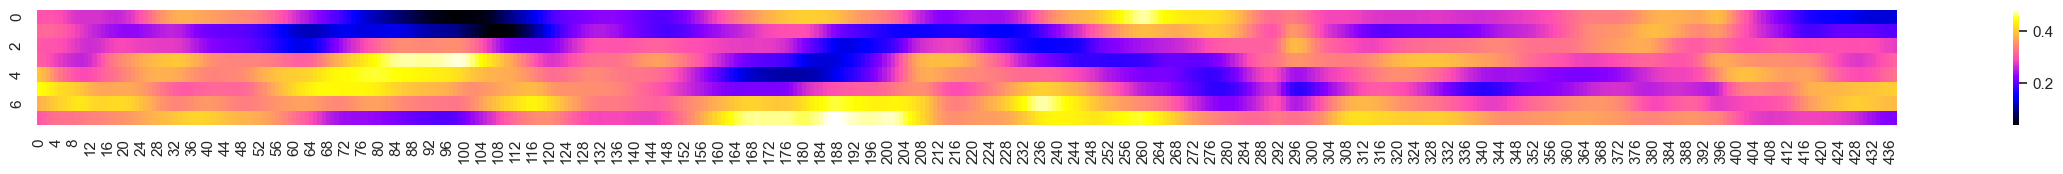

In [40]:
#tf_evoked = np.empty((nFreqs, nIter, nSamps, nBlocks, nChans))
#tfs = np.concatenate((ems[0]['tfs.total'], ems[1]['tfs.total'], ems[2]['tfs.total']), axis=1)
tfs = ems[0]['tfs.total']
tfs = tfs[0, :, :, :, :]
print('Before averaging tfs: ', tfs.shape)
tfs = np.mean(tfs, axis=-2)
tfs = np.mean(tfs, axis=0)
print('After averaging ', tfs.shape)
sns.heatmap(tfs[:,:].transpose(), cmap='gnuplot2')

In [13]:
np.arange(-500, 1249, 4).shape

(438,)

<AxesSubplot: >

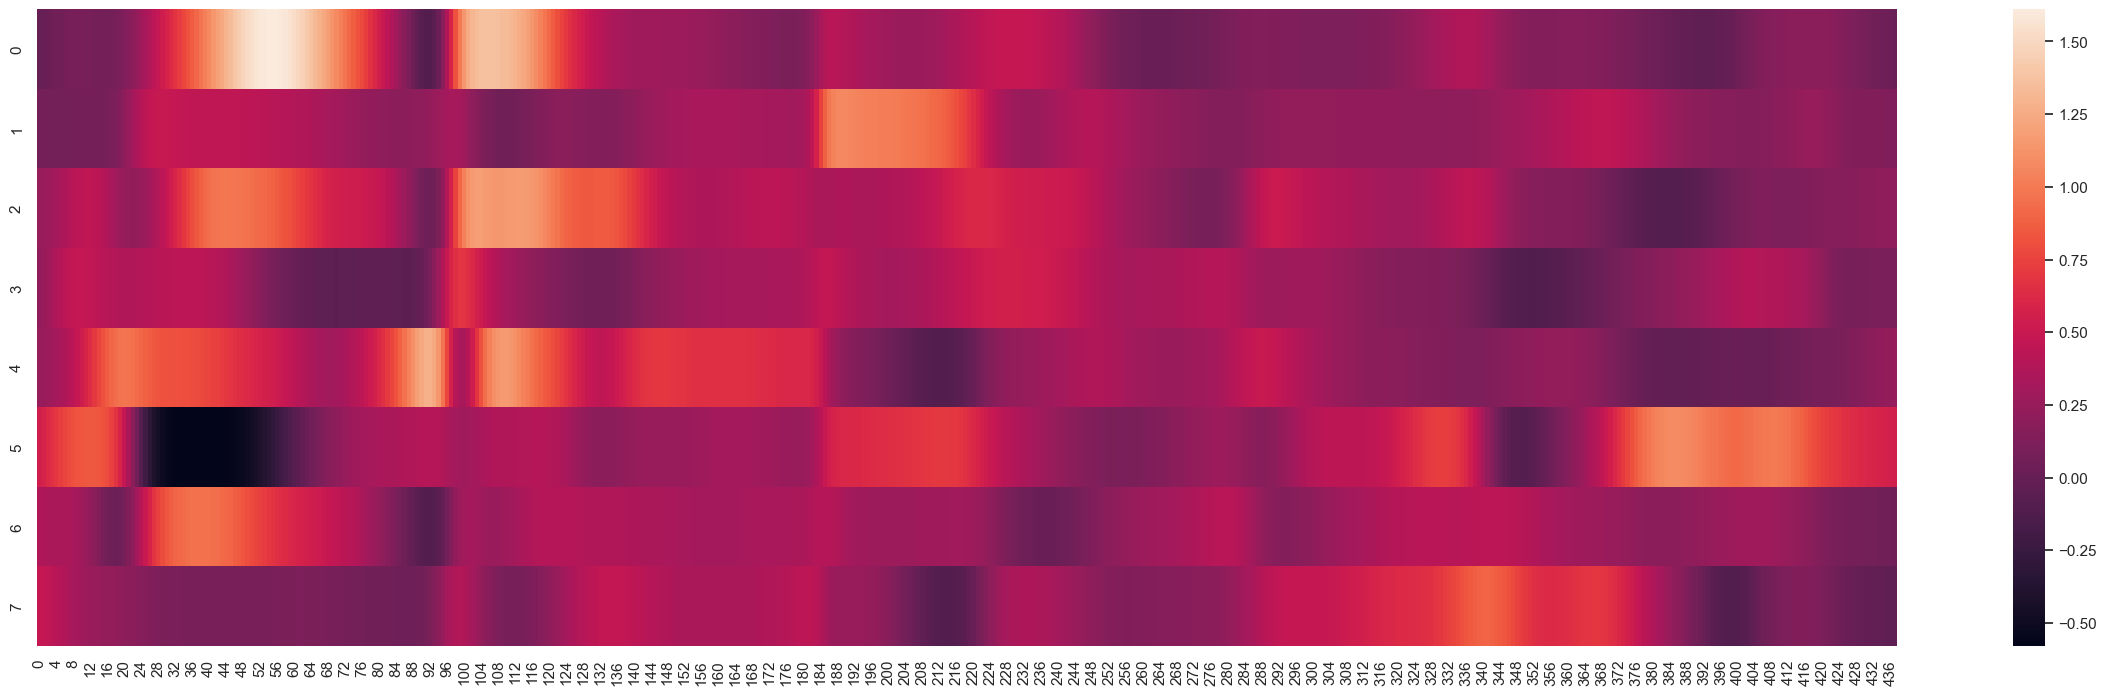

In [47]:
#C2_evoked = np.empty((nFreqs, nIter, nSamps, nBlocks, nBins, nChans))
c2 = em['C2.evoked'][0, 0, :, 0, :, :]
c2 = np.mean(c2, axis=-1)
sns.set(rc={'figure.figsize':(30,8.27)})
sns.heatmap(c2[:,:].transpose())

array([-500, -496, -492, -488, -484, -480, -476, -472, -468, -464, -460,
       -456, -452, -448, -444, -440, -436, -432, -428, -424, -420, -416,
       -412, -408, -404, -400, -396, -392, -388, -384, -380, -376, -372,
       -368, -364, -360, -356, -352, -348, -344, -340, -336, -332, -328,
       -324, -320, -316, -312, -308, -304, -300, -296, -292, -288, -284,
       -280, -276, -272, -268, -264, -260, -256, -252, -248, -244, -240,
       -236, -232, -228, -224, -220, -216, -212, -208, -204, -200, -196,
       -192, -188, -184, -180, -176, -172, -168, -164, -160, -156, -152,
       -148, -144, -140, -136, -132, -128, -124, -120, -116, -112, -108,
       -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,
        -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,
        -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,
         28,   32,   36,   40,   44,   48,   52,   56,   60,   64,   68,
         72,   76,   80,   84,   88,   92,   96,  1

GETTING DATA OUT FROM SPATIALTF FILES

In [17]:
from scipy.io import loadmat
import numpy as np
import mat73

In [33]:
data1 = mat73.loadmat('..\\data\\1_SpatialTF.mat')
data2 = mat73.loadmat('..\\data\\2_SpatialTF.mat')
#data3 = mat73.loadmat('..\\data\\3_SpatialTF.mat')
for _ in data['em']:
    print(_)

C2
Fs
bands
basisSet
blocks
cCenters
frequencies
nBins
nBlocks
nChans
nElectrodes
nIter
nTrials
nTrialsPerBlock
posBin
randSeed
sinPower
tfs
time
window
x


In [34]:
t_ctf1 = data1['em']['tfs']['total']
t_ctf2 = data2['em']['tfs']['total']
t_ctf = np.concatenate((t_ctf1, t_ctf2))
print(f"Before taking averages t_ctf: {t_ctf.shape}")
t_ctf = np.mean(np.mean(t_ctf, axis=-2), axis=0).squeeze()
print(f"After taking averages t_ctf: {t_ctf.shape}")

Before taking averages t_ctf: (20, 438, 3, 8)
After taking averages t_ctf: (438, 8)


<AxesSubplot: >

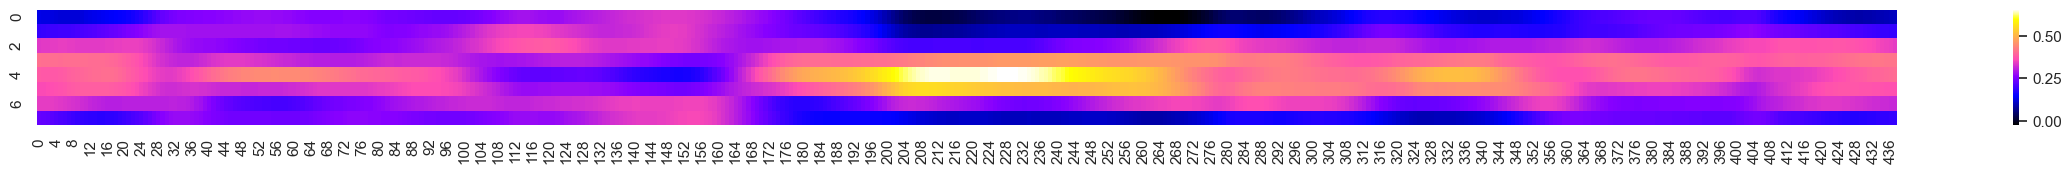

In [35]:
sns.heatmap(t_ctf[:,:].transpose(), cmap='gnuplot2')

<AxesSubplot: >

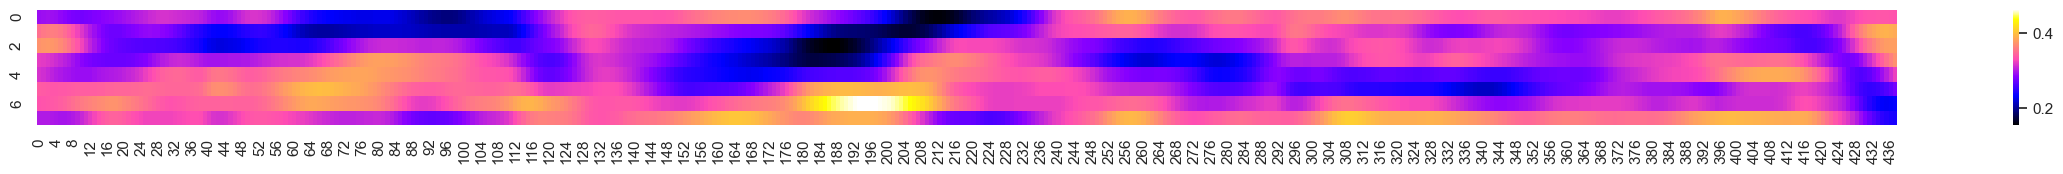

In [31]:
sns.heatmap(tfs[:,:].transpose(), cmap='gnuplot2')

In [4]:
data['em']['time']

NameError: name 'data' is not defined